# LSN Exercise 2

In this second exercise we are going to use **Monte Carlo sampling techniques** for 2 aims: 
- the evaluation of definite integrals;
- the representation of a **random walk (RW)** in 3D space, checking also its diffusive properties. 

In [2]:
# Settings and libraries:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
SCALE = 6
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

# Input functions:

def Read(filename):
    with open(filename) as f:
        vector = [float(i) for i in f.read().splitlines()]
    return vector

## 2.1 Monte Carlo integration

We want to obtain an estimation of the following integral using Monte Carlo techniques:

$$ I = \int_0^1 \frac{\pi}{2}\cos \left(\frac{\pi}{2} x \right) dx = 1 $$

In order to do that we think the integral as:

$$ I = \int g(x) p(x) dx $$

with $p(x)$ an appropriate normalized pdf and $g(x)$ a function, such that:

$$ g(x) p(x) = \frac{\pi}{2}\cos \left(\frac{\pi}{2} x \right) $$

$ p(x) dx $ is the new *measure of integration*, and from its definition depends the sampling strategy and the precision in the estimation of the integral. We adopt two different choices of $p(x)$ and we show that the *intrinsic uncertainty* in the estimation of $I$ changes. For both choices of $p(x)$ we perform $ M = 1000 $ estimation of the integral drawing $ N = 1000 $ random numbers from $p(x)$ and evaluating:

$$ I_N = \frac{1}{N} \sum_{i=1}^{N} g(x_i) $$ 

with $x_i$ extracted from $p(x)$. If we assume that $I$ can't be known more precisely than $\sigma_I$ for a given $p(x)$, using the CLT on $I_N$ seen as sum of random variables:

$$ \sigma_N \sim \frac{\sigma_I}{\sqrt{N}} $$

in our case: $ \sigma_I \sim \sqrt{1000} \, \sigma_N $. Using data-blocking technique with a single evalutation of $I_N$ in each block, a second CLT applies on the $M$ estimations of $I_N$: the $M$ values of $I_N$ are normally distributed with standard deviation:

$$ \sigma_M \sim \frac{\sigma_N}{\sqrt{M}}$$

We can get a reasonable estimation of $\sigma_N$ performing a normal distribution fit on the values of the integrals (file "Integrali.txt"), therefore a possible value of $\sigma_I$.

The **first choice** of $p(x)$ is a uniform distribution in the range $[0,1]$, for which we have:

$$  g(x) = \frac{\pi}{2}\cos \left(\frac{\pi}{2} x \right) \quad \quad p(x) = 1 \, , \, x \in [0,1] \quad x_i \sim \mathscr{U}(0,1)$$

The following plot show the convergence to the expected value over $1000$ estimation of $I$; as always, error bars are computed as standard deviations of the mean and using data-blocking technique.

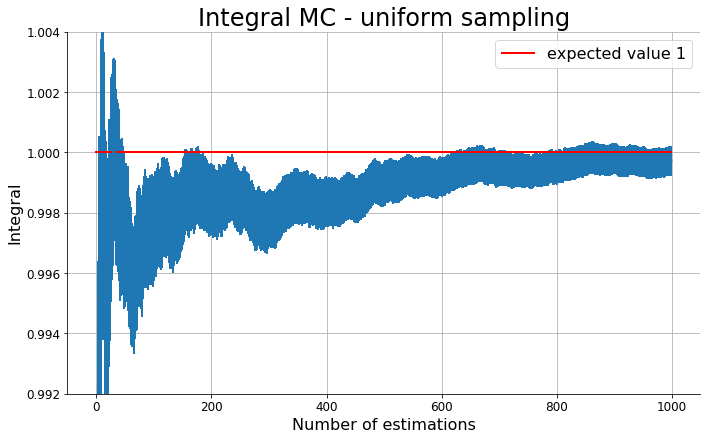

In [4]:
N = 1000
M = 1000

Means = Read("Int/I_unif.txt")
Errors = Read("Int/I_error_unif.txt")

TITLE_SIZE = 24
LABEL_SIZE = 16

t = np.arange(M)
expected = [1 for i in t]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Integral MC - uniform sampling", fontsize=TITLE_SIZE)
plt.xlabel("Number of estimations", fontsize=LABEL_SIZE)
plt.ylabel("Integral", fontsize=LABEL_SIZE)
plt.ylim(0.992,1.004)
plt.plot(t, expected, 'red', label="expected value 1")
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

We now proceed to get a reasonable estimation of the *intrinsic uncertainty* for the evaluation of the integral a single time using uniform sampling. We also show in a plot the comparison between the error trend given by the experimental results and the error trend $ \frac{\sigma_N}{\sqrt{M}} $, with $ \sigma_N $ extrapolated from a normal pdf fit over datas.

The best values for the continuous normal pdf which best fit the datas are:
mean =  0.9997
stdev =  0.0152


An estimation for the intrinsic error in a MC calculation using uniform sampling is:
Integral error =  0.481


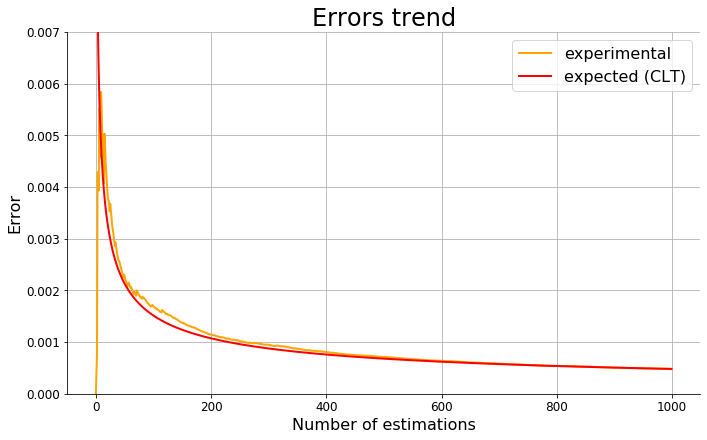

In [5]:
integrali = Read("Int/Integrali.txt")

(mu, sigma) = stat.norm.fit(integrali)       # Normal fit parameters

print("The best values for the continuous normal pdf which best fit the datas are:")
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))
print("\n")

theory = [sigma/np.sqrt(i+1) for i in t]     # CLT: sigma/sqrt(M)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(t, Errors, 'orange', label="experimental")
plt.plot(t, theory, 'red', label="expected (CLT)")
plt.title("Errors trend", fontsize=TITLE_SIZE)
plt.xlabel("Number of estimations", fontsize=LABEL_SIZE)
plt.ylabel("Error", fontsize=LABEL_SIZE)
plt.ylim((0,0.007))
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

error = sigma*np.sqrt(N)     # CLT: sigma = error/sqrt(N)

print("An estimation for the intrinsic error in a MC calculation using uniform sampling is:")
print("Integral error = ", round(error,3))

The **second choice** of $p(x)$ relies on the concept of *importance sampling*: we want a pdf which is similar to the integrand function in order to make the error of the estimation smaller. For the sake of demonstration of this powerful approach we choose a $p(x)$ that is better than a uniform distribution but not too much similar to the integrand; we show that the error becomes smaller using the same steps of the previous case. We use an exponential distribution normalized in the interval $[0,1]$ with decay constant $ \lambda = \frac{\pi}{2} $:

$$ p(x) =  \frac{\lambda}{1- e^{-\lambda}} e^{-\lambda x} $$ 

we can sample from this distribution using the *inverse cumulative method*, obtaining:

$$ x = -\frac{2}{\pi} \ln \left( 1 - \left( 1-e^{- \frac{\pi}{2}} \right) y \right) $$

with $ y \sim \mathscr{U}(0,1)$. Following the same route as before we see a faster convergence to the expected value as shown in the following plot.

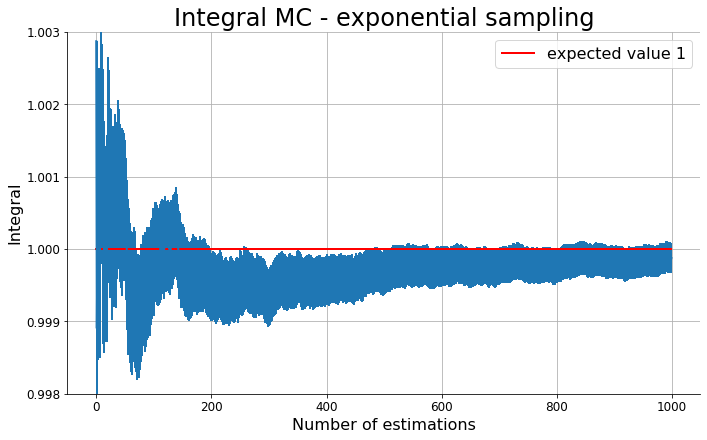

In [6]:
Means = Read("Int/I_exp.txt")
Errors = Read("Int/I_error_exp.txt")

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Integral MC - exponential sampling", fontsize=TITLE_SIZE)
plt.xlabel("Number of estimations", fontsize=LABEL_SIZE)
plt.ylabel("Integral", fontsize=LABEL_SIZE)
plt.ylim(0.998,1.003)
plt.plot(t, expected, 'red', label="expected value 1")
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

The best values for the continuous normal pdf which best fit the datas are:
mean =  0.9999
stdev =  0.0067


An estimation for the intrinsic error in a MC calculation using exponential sampling is:
Integral error =  0.211


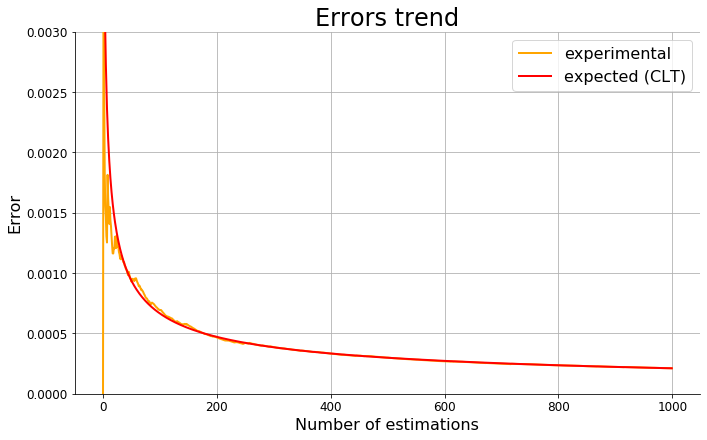

In [7]:
integrali = Read("Int/Integrali_exp.txt")

(mu, sigma) = stat.norm.fit(integrali)       # Normal fit parameters

print("The best values for the continuous normal pdf which best fit the datas are:")
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))
print("\n")

theory = [sigma/np.sqrt(i+1) for i in t]     # CLT: sigma/sqrt(M)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(t, Errors, 'orange', label="experimental")
plt.plot(t, theory, 'red', label="expected (CLT)")
plt.title("Errors trend", fontsize=TITLE_SIZE)
plt.xlabel("Number of estimations", fontsize=LABEL_SIZE)
plt.ylabel("Error", fontsize=LABEL_SIZE)
plt.ylim((0,0.003))
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

error = sigma*np.sqrt(n_step)     # CLT: sigma = error/sqrt(N)

print("An estimation for the intrinsic error in a MC calculation using exponential sampling is:")
print("Integral error = ", round(error,3))

The error obtained is twice smaller than the previous one:

$$ \sigma_{unif} \approx 0.48 \quad \quad \sigma_{exp} \approx 0.21 $$

Both choices are valid, as after $600$ evaluation of the integral with the same number of points the average value is near to the expected one up to the third decimal point; in both cases the error trend over the simulations is also in agreement with the inverse radical law predicted by the CLT. However, the importance sampling technique guarantees a faster and more precise convergence to the expected value.

## 2.2 Random walks

We simulate two ensemble of random walks in 3D space using Monte Carlo sampling methods. RWs of the same dimension may represent different phenomena but they all belong to the same *universality class*, beacuse the *ensemble properties* are unchanged.

**First ensemble**: *RW on a 3D cubic lattice of unitary spacing*.

We consider an ensemble of $10000$ walkers starting at the origin of the cubic lattice, each making $1000$ steps in total. All the walkers make one forward or backward move in one of the three different directions at each time step. To implement this we simply build a partition of the interval $[0,1]$ with $6$ subintervals and we draw random numbers from a unifrom distribution: every interval represents one of the $6$ possible events of motion. Because we have to draw $10^7$ random numbers and each time check to which subinterval the number belongs, we perform *binary search* to obtain more efficiency, constructing a tree which starts from the half of the interval and then proceeds with following cuts. At every step we save the position of every walker at the previous step, in order to evaluate the *root mean square distance* from the origin as described in what follows.

Here we show one of the RWs randomly picked from the ensemble. 

Text(0.5, 0, '$Z(N)$')

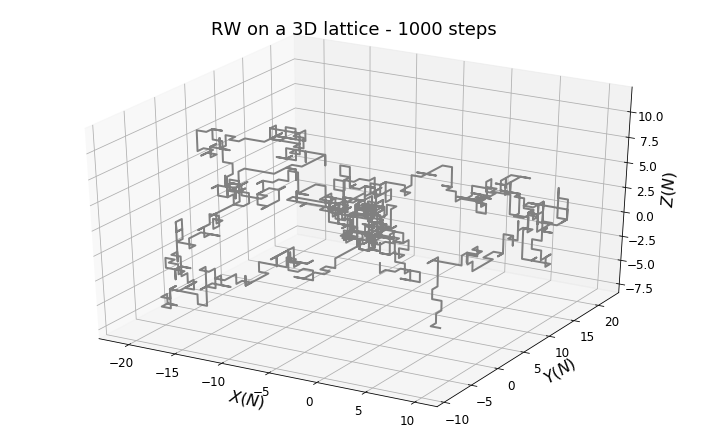

In [29]:
X = Read("RW/X.txt")
Y = Read("RW/Y.txt")
Z = Read("RW/Z.txt")

fig = plt.figure(figsize=FIG_SIZE, constrained_layout=True)
axes = fig.add_subplot(111, projection='3d')

axes.plot(X, Y, Z, color='grey')
axes.set_title("RW on a 3D lattice - 1000 steps")
axes.set_xlabel("$X(N)$")
axes.set_ylabel("$Y(N)$")
axes.set_zlabel("$Z(N)$")

We want to study the dependece on the number of steps of one important ensemble property: the *root mean square distance*, defined as the square root of the average value of the sum of the square distances from the origin:

$$ RMSD = \sqrt{\langle S_N^2 \rangle} \quad , \quad S_N^2 = \left( \sum_{i=1}^N l_i \right)^2 $$

is it possible to show that, in every dimension, the $RMSD$ is proportional to $\sqrt{N}$, with a proportionality constant that depends on the step length and the dimension of the walk. To evaluate $S_N$ we simply build two cicles on the vector of RWs: the first over the steps and the second over the walkers; then we evaluate the Euclidean distance from the origin for every walker and we sum up all the distances. We can extrapolate the constant of proportionality defining a radical law $ k \sqrt{x} $ and implementig a fit using the "scipy.optimize" library.

As the fitting results show, we can safely conclude that $ k=1 $. 

Radical law fitting results:
k =  1.0005  +/-  3e-09


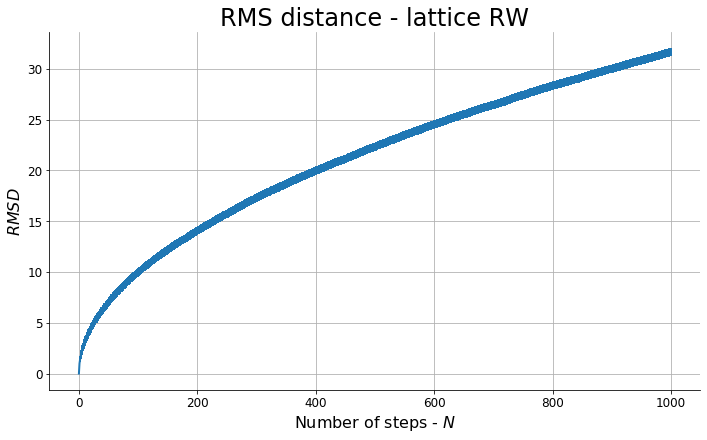

In [28]:
n_step = 1000

dist = Read("RW/dist_lattice.txt")
err = Read("RW/dist_err_lattice.txt")

def sqr(x,k):
    return k*np.sqrt(x)

N = np.arange(0,n_step)

param, cov = opt.curve_fit(sqr,N,dist)

print("Radical law fitting results:")
print("k = ", round(param[0],4), " +/- ", round(cov[0][0],9))

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, dist, yerr=err)
plt.title("RMS distance - lattice RW", fontsize=TITLE_SIZE)
plt.xlabel("Number of steps - $N$", fontsize=LABEL_SIZE)
plt.ylabel("$ RMSD $", fontsize=LABEL_SIZE)
plt.grid(True)

**Second ensemble**: *RW in continuum 3D space, with unitary length step*.

We again consider an ensemble of $10000$ walkers making $1000$ total steps. To simulate a random motion in continuum we have to sample from the solid angle $ d\Omega = \sin \theta d\theta d\phi $, seen as a joint distribution of two indipendent random variables: $ p(\theta, \phi) = p_{\theta}(\theta)p_{\phi}(\phi) $. Setting $ r = 1 $, in spherical coordinates we have:

$$ x = \sin \theta \cos \phi \quad y = \sin \theta \sin \phi \quad z = \cos \theta $$

with $ \theta \sim \mathcal{P}(\theta) = \frac{1}{2} \sin \theta $ and $ \phi \sim \mathscr{U}(0,2\pi) $. As in the previous case we study the dependence of the *root mean square distance* from the origin. 

We first show one of the RWs randomly picked from the ensemble. 

Text(0.5, 0, '$Z(N)$')

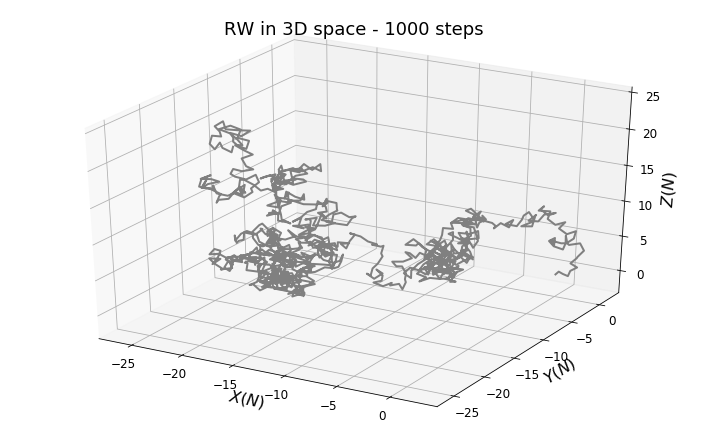

In [30]:
X = Read("RW/Xc.txt")
Y = Read("RW/Yc.txt")
Z = Read("RW/Zc.txt")

fig = plt.figure(figsize=FIG_SIZE, constrained_layout=True)
axes = fig.add_subplot(111, projection='3d')

axes.plot(X, Y, Z, color='grey')
axes.set_title("RW in 3D space - 1000 steps")
axes.set_xlabel("$X(N)$")
axes.set_ylabel("$Y(N)$")
axes.set_zlabel("$Z(N)$")

As in the lattice case, we can study the $RMSD$ as a function of the steps, as shown in the following plot. The fitting results show us that the two processes are features by the same $\sqrt{N}$ law.

Radical law fitting results:
k =  0.9952  +/-  5e-09


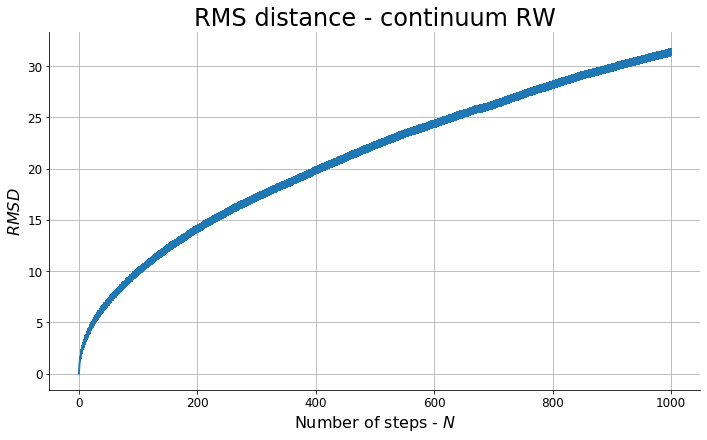

In [27]:
dist = Read("RW/dist_continuum.txt")
err = Read("RW/dist_err_continuum.txt")

param, cov = opt.curve_fit(sqr,N,dist)

print("Radical law fitting results:")
print("k = ", round(param[0],4), " +/- ", round(cov[0][0],9))

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, dist, yerr=err)
plt.title("RMS distance - continuum RW", fontsize=TITLE_SIZE)
plt.xlabel("Number of steps - $N$", fontsize=LABEL_SIZE)
plt.ylabel("$ RMSD $", fontsize=LABEL_SIZE)
plt.grid(True)